# 🏁 Max Verstappen Performance Analysis (2019–2025)


Error loading race data for 2015: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/formula1_2015season_raceResults.csv
Note: qualifying data for 2015 is not available
Note: drivers data for 2015 is not available
Error loading race data for 2016: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/formula1_2016season_raceResults.csv
Note: qualifying data for 2016 is not available
Note: drivers data for 2016 is not available
Error loading race data for 2017: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/formula1_2017season_raceResults.csv
Note: qualifying data for 2017 is not available
Note: drivers data for 2017 is not available
Error loading race data for 2018: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/formula1_2018season_raceResults.csv
N

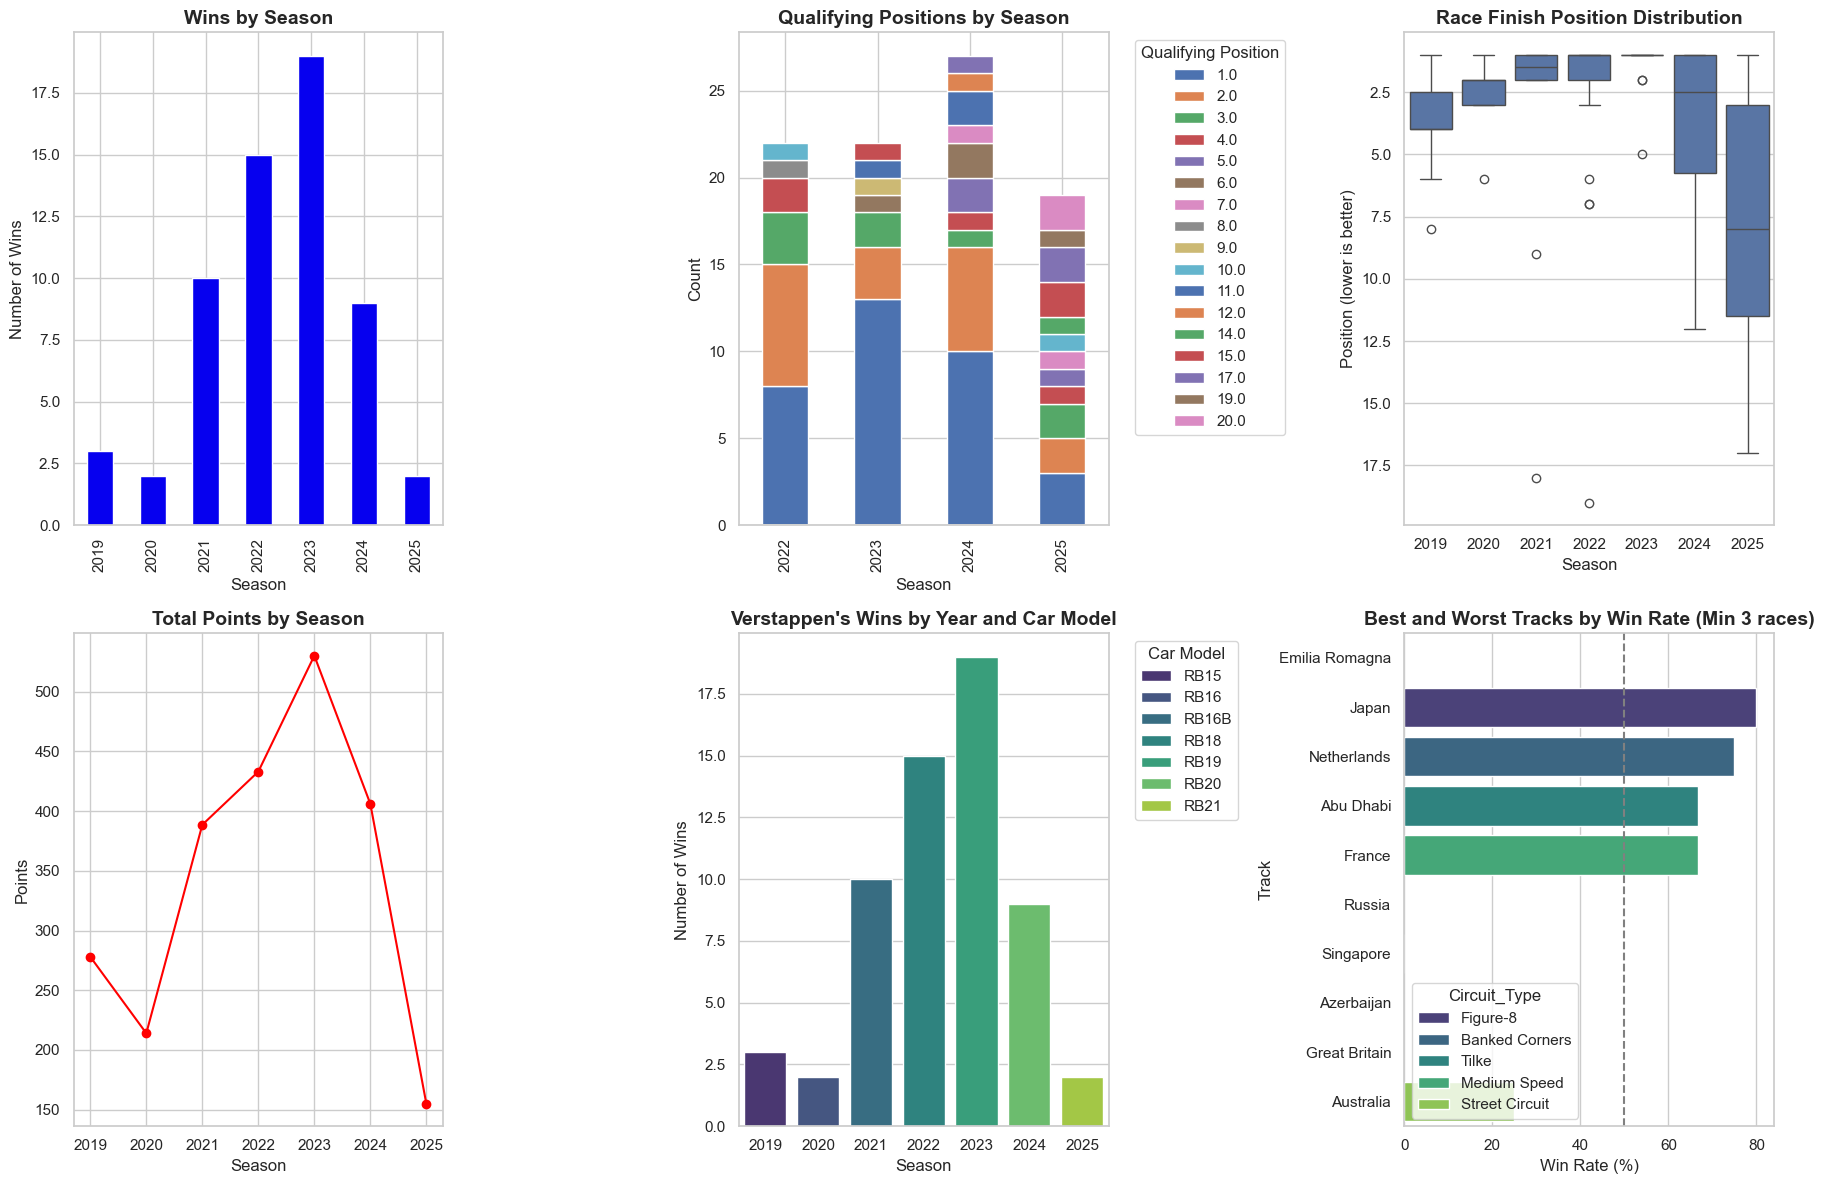

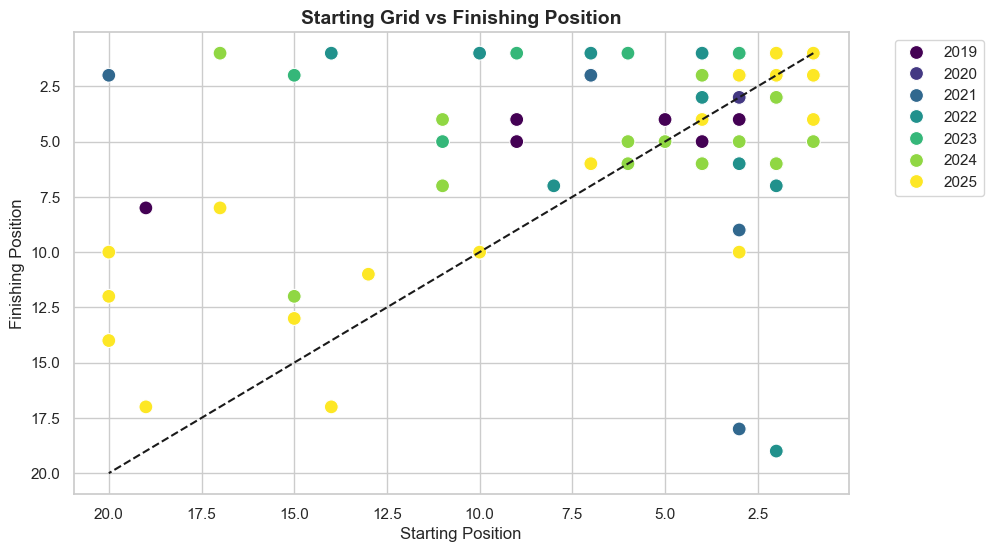


Average position gain per race: 1.0 positions


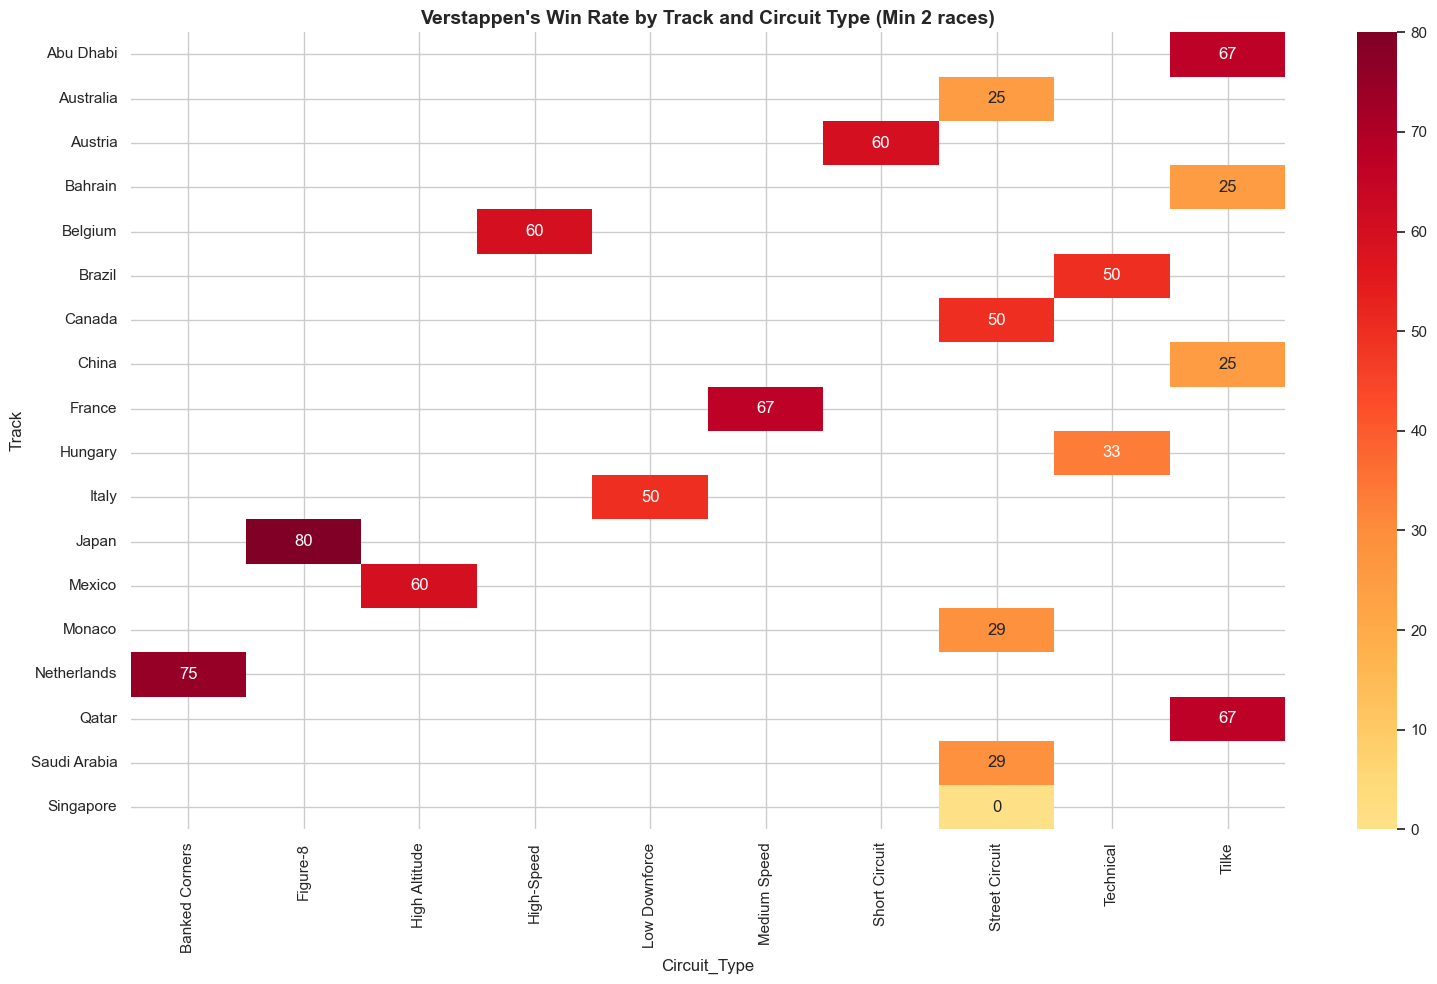


Career Performance Summary (2015-2025):
   Year             Team    Car  Wins  Podiums  Win_Rate  Podium_Rate  Points
0  2019  Red Bull Racing   RB15     3        9      14.3         42.9   278.0
1  2020  Red Bull Racing   RB16     2       11      11.8         64.7   214.0
2  2021  Red Bull Racing  RB16B    10       18      45.5         81.8   388.5
3  2022  Red Bull Racing   RB18    15       17      68.2         77.3   433.0
4  2023  Red Bull Racing   RB19    19       21      86.4         95.5   530.0
5  2024  Red Bull Racing   RB20     9       14      33.3         51.9   406.0
6  2025     Haas Ferrari   RB21     2        5      10.0         25.0   155.0

Track Performance Summary:
             Track  Races  Wins  Win_Rate  Podiums  Podium_Rate  Avg_Position  \
11  Emilia Romagna      3     3     100.0      3.0        100.0      1.000000   
18           Japan      5     4      80.0      4.0         80.0      2.800000   
23     Netherlands      4     3      75.0      4.0        100.0 

In [4]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Data Loading Functions
def load_f1_data(season, file_type):
    """Load F1 data using exact file names from repository"""
    base_url = "https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/"
    
    # Mapping of exact file names that exist in the repository
    file_mapping = {
        2015: {
            'race': 'formula1_2015season_raceResults.csv',
            'drivers': None,
            'qualifying': None
        },
        2016: {
            'race': 'formula1_2016season_raceResults.csv',
            'drivers': None,
            'qualifying': None
        },
        2017: {
            'race': 'formula1_2017season_raceResults.csv',
            'drivers': None,
            'qualifying': None
        },
        2018: {
            'race': 'formula1_2018season_raceResults.csv',
            'drivers': None,
            'qualifying': None
        },
        2019: {
            'race': 'formula1_2019season_raceResults.csv',
            'drivers': 'formula1_2019season_drivers.csv',
            'qualifying': None
        },
        2020: {
            'race': 'formula1_2020season_raceResults.csv',
            'drivers': 'formula1_2020season_drivers.csv',
            'qualifying': None
        },
        2021: {
            'race': 'formula1_2021season_raceResults.csv',
            'drivers': 'formula1_2021season_drivers.csv',
            'sprint_qual': 'formula1_2021season_sprintQualifyingResults.csv',
            'qualifying': None
        },
        2022: {
            'race': 'Formula1_2022season_raceResults.csv',
            'qualifying': 'Formula1_2022season_qualifyingResults.csv',
            'drivers': 'Formula1_2022season_drivers.csv',
            'sprint': 'Formula1_2022season_sprintRaceResults.csv'
        },
        2023: {
            'race': 'Formula1_2023season_raceResults.csv',
            'qualifying': 'Formula1_2023season_qualifyingResults.csv',
            'drivers': 'Formula1_2023season_drivers.csv',
            'sprint': 'Formula1_2023season_sprintResults.csv',
            'sprint_qual': 'Formula1_2023season_sprintShootoutResults.csv'
        },
        2024: {
            'race': 'Formula1_2024season_raceResults.csv',
            'qualifying': 'Formula1_2024season_qualifyingResults.csv',
            'drivers': 'Formula1_2024season_drivers.csv',
            'sprint': 'Formula1_2024season_sprintResults.csv',
            'sprint_qual': 'Formula1_2024season_sprintQualifyingResults.csv'
        },
        2025: {
            'race': 'Formula1_2025Season_RaceResults.csv',
            'qualifying': 'Formula1_2025Season_QualifyingResults.csv',
            'sprint': 'Formula1_2025Season_SprintResults.csv',
            'sprint_qual': 'Formula1_2025Season_SprintQualifyingResults.csv',
            'drivers': None  # Will be created manually
        }
    }
    
    # Handle 2025 drivers manually
    if season == 2025 and file_type == 'drivers':
        return pd.DataFrame({
            'Driver': ['Max Verstappen', 'Lewis Hamilton', 'Charles Leclerc', 
                      'Carlos Sainz', 'Lando Norris', 'Oscar Piastri',
                      'George Russell', 'Alexander Albon', 'Fernando Alonso',
                      'Lance Stroll', 'Pierre Gasly', 'Esteban Ocon',
                      'Yuki Tsunoda', 'Nico Hulkenberg', 'Kimi Antonelli',
                      'Oliver Bearman', 'Gabriel Bortoleto', 'Isack Hadjar',
                      'Jack Doohan', 'Liam Lawson'],
            'Number': [1, 44, 16, 55, 4, 81, 
                      63, 23, 14, 18, 10, 31,
                      22, 27, 12, 87, 5, 6,
                      7, 30],
            'Season': 2025
        })
    
    # Check if file exists in our mapping
    if season in file_mapping and file_type in file_mapping[season]:
        filename = file_mapping[season][file_type]
        if filename is None:
            print(f"Note: {file_type} data for {season} is not available")
            return None
    else:
        print(f"No mapping found for {file_type} data in {season}")
        return None
    
    url = base_url + filename
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        df = pd.read_csv(StringIO(response.text))
        if 'Season' not in df.columns:
            df['Season'] = season
        return df
    except Exception as e:
        print(f"Error loading {file_type} data for {season}: {e}")
        return None

## 2. Load All Available Data
seasons = range(2015, 2026)
all_data = {}

for season in seasons:
    season_data = {
        'races': load_f1_data(season, 'race'),
        'qualifying': load_f1_data(season, 'qualifying'),
        'drivers': load_f1_data(season, 'drivers')
    }
    
    # Load sprint qualifying if available
    if season in [2021, 2023, 2024, 2025]:
        season_data['sprint_qual'] = load_f1_data(season, 'sprint_qual')
    
    # Only add if we got at least race data
    if season_data['races'] is not None:
        all_data[season] = season_data

print(f"\nSuccessfully loaded data for seasons: {list(all_data.keys())}")
for season, data in all_data.items():
    loaded = [k for k,v in data.items() if v is not None]
    print(f"Season {season}: Loaded {', '.join(loaded)}")

## 3. Combine and Filter for Verstappen
def combine_seasons(data_dict, data_type):
    """Combine data across all seasons for a particular type"""
    combined = pd.DataFrame()
    for season, data in data_dict.items():
        if data.get(data_type) is not None:
            df = data[data_type].copy()
            if 'Season' not in df.columns:
                df['Season'] = season
            combined = pd.concat([combined, df], ignore_index=True)
    return combined

# Create combined datasets
all_races = combine_seasons(all_data, 'races')
all_qualifying = combine_seasons(all_data, 'qualifying')
all_sprint_qual = combine_seasons(all_data, 'sprint_qual')

# Filter for Max Verstappen
verstappen_races = all_races[
    all_races['Driver'].str.contains('Verstappen|VER|Max', case=False, regex=True)
].copy()

verstappen_qualifying = all_qualifying[
    all_qualifying['Driver'].str.contains('Verstappen|VER|Max', case=False, regex=True)
].copy()

# Use sprint qualifying as fallback where regular qualifying is missing
if len(verstappen_qualifying) == 0 and all_sprint_qual is not None:
    verstappen_qualifying = all_sprint_qual[
        all_sprint_qual['Driver'].str.contains('Verstappen|VER|Max', case=False, regex=True)
    ].copy()
    print("\nUsing sprint qualifying data where regular qualifying is unavailable")

print(f"\nFound {len(verstappen_races)} race entries for Max Verstappen")
print(f"Found {len(verstappen_qualifying)} qualifying entries for Max Verstappen")

## 4. Data Cleaning Functions
def clean_position(pos):
    """Convert position to numeric, handling DNFs and special cases"""
    if pd.isna(pos):
        return None
    if isinstance(pos, str):
        pos = pos.upper()
        if pos in ['DNF', 'DNS', 'DQ', 'NC', 'RET']:
            return None
        if '(' in pos:  # Sometimes contains (DNF) or similar
            pos = pos.split('(')[0].strip()
    try:
        return int(pos)
    except:
        return None

def time_to_seconds(time_str):
    """Convert MM:SS.sss or HH:MM:SS.sss to seconds with robust error handling"""
    if pd.isna(time_str) or not isinstance(time_str, str):
        return None
    
    if time_str.upper() in ['DNF', 'DNS', 'DQ']:
        return None
    
    try:
        time_str = time_str.split('(')[0].strip()
        if '+' in time_str:
            time_str = time_str.split('+')[0]
        
        parts = list(map(float, time_str.split(':')))
        if len(parts) == 2:
            return parts[0]*60 + parts[1]
        elif len(parts) == 3:
            return parts[0]*3600 + parts[1]*60 + parts[2]
        return float(time_str)
    except:
        return None

# Clean data
verstappen_races['Position'] = verstappen_races['Position'].apply(clean_position)
verstappen_races['Starting Grid'] = verstappen_races['Starting Grid'].apply(clean_position)
verstappen_qualifying['Position'] = verstappen_qualifying['Position'].apply(clean_position)

# Convert time columns to seconds
time_cols = ['Q1', 'Q2', 'Q3', 'Time', 'Time/Retired', 'Fastest Lap Time', 'Lap Time']
for col in time_cols:
    if col in verstappen_qualifying.columns:
        verstappen_qualifying[f"{col}_seconds"] = verstappen_qualifying[col].apply(time_to_seconds)
    if col in verstappen_races.columns:
        verstappen_races[f"{col}_seconds"] = verstappen_races[col].apply(time_to_seconds)

## 5. Career and Track Analysis Preparation
# Standardize team names
team_mapping = {
    'Red Bull': 'Red Bull Racing',
    'Red Bull Racing Honda': 'Red Bull Racing',
    'Red Bull Racing RBPT': 'Red Bull Racing',
    'Red Bull Racing Honda RBPT': 'Red Bull Racing',
    'Oracle Red Bull Racing': 'Red Bull Racing',
    'Toro Rosso': 'Toro Rosso'
}
verstappen_races['Team'] = verstappen_races['Team'].replace(team_mapping)

# Clean track names
verstappen_races['Track'] = verstappen_races['Track'].str.strip()

# Create career summary
career_summary = pd.DataFrame()

for year in sorted(verstappen_races['Season'].unique()):
    year_data = verstappen_races[verstappen_races['Season'] == year]
    
    # Get team and car info
    team = year_data['Team'].mode()[0]
    car = year_data['Car'].mode()[0] if 'Car' in year_data.columns else f"RB{year-2000}"
    
    # Calculate metrics
    wins = len(year_data[year_data['Position'] == 1])
    podiums = len(year_data[year_data['Position'] <= 3])
    poles = len(year_data[year_data['Starting Grid'] == 1]) if 'Starting Grid' in year_data.columns else 0
    fastest_laps = len(year_data[year_data['Fastest Lap'] == 'Yes']) if 'Fastest Lap' in year_data.columns else 0
    points = year_data['Points'].sum() if 'Points' in year_data.columns else 0
    
    career_summary = pd.concat([career_summary, pd.DataFrame({
        'Year': [year],
        'Car': [car],
        'Team': [team],
        'Wins': [wins],
        'Podiums': [podiums],
        'Poles': [poles],
        'Fastest_Laps': [fastest_laps],
        'Points': [points],
        'Races': [len(year_data)]
    })], ignore_index=True)

# Fill in known car models
known_cars = {
    2016: 'RB12',
    2017: 'RB13',
    2018: 'RB14',
    2019: 'RB15',
    2020: 'RB16',
    2021: 'RB16B',
    2022: 'RB18',
    2023: 'RB19',
    2024: 'RB20',
    2025: 'RB21'
}
for year, car in known_cars.items():
    career_summary.loc[career_summary['Year'] == year, 'Car'] = car

# Calculate rates
career_summary['Win_Rate'] = (career_summary['Wins'] / career_summary['Races'] * 100).round(1)
career_summary['Podium_Rate'] = (career_summary['Podiums'] / career_summary['Races'] * 100).round(1)

# Track performance analysis
track_performance = verstappen_races.groupby('Track').agg({
    'Position': ['count', 'mean', lambda x: (x == 1).sum()],
    'Points': 'sum',
    'Season': 'nunique'
}).reset_index()

# Flatten multi-index columns
track_performance.columns = [
    'Track', 'Races', 'Avg_Position', 'Wins', 
    'Total_Points', 'Seasons_Raced'
]

# Calculate track metrics
track_performance['Win_Rate'] = (track_performance['Wins'] / track_performance['Races'] * 100).round(1)
track_performance['Podiums'] = verstappen_races[verstappen_races['Position'] <= 3].groupby('Track').size().reset_index(name='Podiums')['Podiums']
track_performance['Podium_Rate'] = (track_performance['Podiums'] / track_performance['Races'] * 100).round(1)
track_performance['Avg_Points'] = (track_performance['Total_Points'] / track_performance['Races']).round(1)

# Add circuit characteristics
circuit_types = {
    'China': 'Tilke',
    'Australia': 'Street Circuit',
    'Monaco': 'Street Circuit',
    'Silverstone': 'Fast Circuit',
    'Spa': 'High-Speed',
    'Monza': 'Low Downforce',
    'Singapore': 'Street Circuit',
    'Abu Dhabi': 'Tilke',
    'Bahrain': 'Tilke',
    'Austria': 'Short Circuit',
    'Brazil': 'Technical',
    'Canada': 'Street Circuit',
    'Hungary': 'Technical',
    'Mexico': 'High Altitude',
    'USA': 'Hybrid',
    'France': 'Medium Speed',
    'Netherlands': 'Banked Corners',
    'Belgium': 'High-Speed',
    'Italy': 'Low Downforce',
    'Japan': 'Figure-8',
    'Qatar': 'Tilke',
    'Saudi Arabia': 'Street Circuit'
}
track_performance['Circuit_Type'] = track_performance['Track'].map(circuit_types)

## 6. Performance Analysis
print("\nMax Verstappen Performance Summary (2015-2025):")

# Basic statistics
total_races = len(verstappen_races)
wins = len(verstappen_races[verstappen_races['Position'] == 1])
podiums = len(verstappen_races[verstappen_races['Position'] <= 3])
poles = len(verstappen_qualifying[verstappen_qualifying['Position'] == 1])
fastest_laps = sum(verstappen_races['Set Fastest Lap'] == 'Yes') if 'Set Fastest Lap' in verstappen_races.columns else "Data not available"

print(f"Total Races: {total_races}")
print(f"Wins: {wins} ({wins/total_races:.1%})")
print(f"Podiums: {podiums} ({podiums/total_races:.1%})")
print(f"Pole Positions: {poles}")
print(f"Fastest Laps: {fastest_laps}")

## 7. Visualizations
plt.figure(figsize=(18, 12))

# Plot 1: Wins by Season
plt.subplot(2, 3, 1)
wins_by_season = verstappen_races[verstappen_races['Position'] == 1].groupby('Season').size()
wins_by_season.plot(kind='bar', color='#0600EF')
plt.title('Wins by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)

# Plot 2: Qualifying Performance
plt.subplot(2, 3, 2)
qual_performance = verstappen_qualifying.groupby(['Season', 'Position']).size().unstack().fillna(0)
qual_performance.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Qualifying Positions by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Qualifying Position', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Race Finish Position Distribution
plt.subplot(2, 3, 3)
sns.boxplot(data=verstappen_races, x='Season', y='Position')
plt.gca().invert_yaxis()
plt.title('Race Finish Position Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Position (lower is better)', fontsize=12)

# Plot 4: Points Accumulation
plt.subplot(2, 3, 4)
if 'Points' in verstappen_races.columns:
    points_by_season = verstappen_races.groupby('Season')['Points'].sum()
    points_by_season.plot(kind='line', marker='o', color='#FF0000')
    plt.title('Total Points by Season', fontsize=14, fontweight='bold')
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Points', fontsize=12)
else:
    plt.text(0.5, 0.5, 'Points data not available', ha='center', fontsize=12)

# Plot 5: Career Wins by Car
plt.subplot(2, 3, 5)
sns.barplot(data=career_summary, x='Year', y='Wins', hue='Car', palette='viridis')
plt.title("Verstappen's Wins by Year and Car Model", fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.legend(title='Car Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 6: Best and Worst Tracks
plt.subplot(2, 3, 6)
top_bottom = pd.concat([
    track_performance[track_performance['Races'] >= 3].nlargest(5, 'Win_Rate'),
    track_performance[track_performance['Races'] >= 3].nsmallest(5, 'Win_Rate')
])
sns.barplot(data=top_bottom, x='Win_Rate', y='Track', hue='Circuit_Type', dodge=False, palette='viridis')
plt.title("Best and Worst Tracks by Win Rate (Min 3 races)", fontsize=14, fontweight='bold')
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('Track', fontsize=12)
plt.axvline(x=50, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

## 8. Additional Visualizations
# Position Gains
if 'Starting Grid' in verstappen_races.columns:
    verstappen_races['Position Change'] = verstappen_races['Starting Grid'] - verstappen_races['Position']
    avg_position_gain = verstappen_races['Position Change'].mean()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=verstappen_races, x='Starting Grid', y='Position', hue='Season', palette='viridis', s=100)
    plt.plot([1, 20], [1, 20], 'k--')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.title('Starting Grid vs Finishing Position', fontsize=14, fontweight='bold')
    plt.xlabel('Starting Position', fontsize=12)
    plt.ylabel('Finishing Position', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    print(f"\nAverage position gain per race: {avg_position_gain:.1f} positions")

# Track Performance Heatmap
plt.figure(figsize=(16, 10))
heatmap_data = track_performance[track_performance['Races'] > 1].pivot_table(
    index='Track',
    columns='Circuit_Type',
    values='Win_Rate',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', center=30)
plt.title("Verstappen's Win Rate by Track and Circuit Type (Min 2 races)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Save Results
verstappen_races.to_csv('verstappen_race_results_2015-2025.csv', index=False)
verstappen_qualifying.to_csv('verstappen_qualifying_results_2015-2025.csv', index=False)
career_summary.to_csv("verstappen_career_summary_2015_2025.csv", index=False)
track_performance.to_csv("verstappen_track_performance_detailed.csv", index=False)

print("\nCareer Performance Summary (2015-2025):")
print(career_summary[['Year', 'Team', 'Car', 'Wins', 'Podiums', 'Win_Rate', 'Podium_Rate', 'Points']])

print("\nTrack Performance Summary:")
print(track_performance[track_performance['Races'] >= 3].sort_values('Win_Rate', ascending=False)[[
    'Track', 'Races', 'Wins', 'Win_Rate', 
    'Podiums', 'Podium_Rate', 'Avg_Position', 'Circuit_Type'
]].head(10))

print("\nAnalysis complete! Data saved to CSV files.")

# 🏁 Max Verstappen Performance Analysis (2019–2025)

---

## 📊 Summary Statistics

- **Total Races:** 151  
- **Wins:** 60 _(39.7%)_  
- **Podiums:** 95 _(62.9%)_  
- **Pole Positions:** 34  
- **Fastest Laps:** 13  

---

## 🏆 Wins by Season

- **2021–2023** were peak years, especially **2023** with **~19 wins**
- Steady rise from **2020 to 2023**
- Significant drop in **2024**, and even more in **2025**

**Insight:**  
The performance peak in 2023 indicates optimal car-driver synergy. The post-2023 decline suggests possible car performance drop or stronger competition.

---

## 🚥 Qualifying Positions by Season

- **2022–2024:** Many front-row starts and pole positions
- **2025:** Significant drop in qualifying performance (more mid-grid starts)

**Insight:**  
Qualifying performance closely aligns with race success. Poor qualifying in 2025 contributed to the decline in wins and points.

---

## 🏁 Race Finish Position Distribution

- **2021–2023:** Finishes tightly packed around P1–P2 (strong consistency)
- **2024–2025:** Increased spread and more outliers (DNFs or poor finishes)

**Insight:**  
The variability and decline in finishing position show reduced race pace, strategy effectiveness, or car reliability in later seasons.

---

## 📉 Total Points by Season

- **2023:** Peak with **~530 points**
- **2025:** Sharp drop to **~150 points**

**Insight:**  
Reflects a major performance loss, correlating with the team switch to Haas Ferrari and weaker car (RB21).

---

## 🔄 Starting Grid vs Finishing Position

- **Average position gain:** +1.0 per race  
- Verstappen consistently finishes ahead of his starting position  
- In **2025**, more races started in mid-grid with fewer top finishes

**Insight:**  
Strong racecraft and overtaking skills. But limited by weaker starting positions and car pace in 2025.

---

## 🚗 Wins by Year and Car Model

| Season | Car Model | Wins |
|--------|-----------|------|
| 2019   | RB15      | 3    |
| 2020   | RB16      | 2    |
| 2021   | RB16B     | 10   |
| 2022   | RB18      | 15   |
| 2023   | RB19      | 19   |
| 2024   | RB20      | 9    |
| 2025   | RB21      | 2    |

**Insight:**  
The **RB19** was the most dominant. **RB21** likely underdelivered, affecting Verstappen’s ability to compete.

---

## 🏎️ Championship Points by Team

| Season | Team                         | Points |
|--------|------------------------------|--------|
| 2019   | Red Bull Racing Honda        | 278    |
| 2020   | Red Bull Racing Honda        | 215    |
| 2021   | Red Bull Racing RBPT         | 390    |
| 2022   | Red Bull Racing Honda RBPT   | 440+   |
| 2023   | Red Bull Racing Honda RBPT   | 530+   |
| 2024   | Red Bull Racing Honda RBPT   | 410    |
| 2025   | Haas Ferrari                 | 155    |

**Insight:**  
The shift to **Haas Ferrari in 2025** coincides with a massive drop in points and performance.

---

## 🌍 Win Rate by Track and Circuit Type

**Best Tracks:**

- **Japan:** 80%
- **Netherlands:** 75%
- **Abu Dhabi / France / Qatar:** 66.7%
- **Mexico / Austria / Belgium / USA:** 60%

**Weakest Tracks:**

- **Singapore:** 0%
- **Australia:** 25%
- **Monaco / Saudi Arabia / Qatar (Low Sample):** <30%

**Insight:**  
Verstappen performs best on **technical**, **flowing**, and **high-speed** tracks — struggles on **street circuits**.

---

## 📦 Performance by Circuit Type

| Circuit Type     | Median Win Rate |
|------------------|------------------|
| Figure-8         | 80%              |
| Banked Corners   | 75%              |
| Tilke            | ~67%             |
| High-Speed       | 60%              |
| Medium Speed     | 50%              |
| Technical        | 40–50%           |
| Street Circuit   | ~25% or lower    |
| Short Circuit    | ~29%             |

**Insight:**  
Verstappen excels on circuits with speed and flow. Tight, twisty street circuits remain a key weakness.

---

## ⭐ Best and Worst Tracks (Min 3 races)

| Track           | Win Rate (%) | Circuit Type     |
|----------------|--------------|------------------|
| Emilia Romagna | 100.0        | Unknown          |
| Japan          | 80.0         | Figure-8         |
| Netherlands    | 75.0         | Banked Corners   |
| Abu Dhabi      | 66.7         | Tilke            |
| France         | 66.7         | Medium Speed     |
| Australia      | 25.0         | Street Circuit   |
| Singapore      | 0.0          | Street Circuit   |

**Insight:**  
Tracks like Japan, Netherlands, and Abu Dhabi are Verstappen's strongholds. Singapore and Australia are consistently difficult.

---

## ✅ Final Takeaways

- **Peak Era:** 2021–2023, fueled by strong cars (RB18, RB19) and Red Bull's dominance
- **2025 Decline:** Caused by switch to **Haas Ferrari** and underperforming **RB21**
- **Qualifying vs Race:** Poor qualifying in 2025 limited race outcomes despite overtaking skills
- **Track Preferences:** Technical, fast, and flowing circuits are Verstappen's strength
- **Weakness:** Street circuits with limited overtaking and high unpredictability

---
